নিশ্চয়ই! নিচে বাংলায় ব্যাখ্যা করছি কীভাবে আপনি একটি **Low Pass FIR Filter** ডিজাইন করবেন এবং তা কনভলিউশন (convolution) ব্যবহার করে সংকেত থেকে উচ্চ-ফ্রিকোয়েন্সির শব্দ (noise) বাদ দেবেন।

---

### ✅ আমাদের যা যা করতে হবে:

#### **১. ফিল্টারের স্পেসিফিকেশন নির্ধারণ করতে হবে:**

* স্যাম্পলিং ফ্রিকোয়েন্সি ($f_s$) – যেমন, প্রতি সেকেন্ডে কতবার সিগন্যাল রেকর্ড হচ্ছে।
* কাট-অফ ফ্রিকোয়েন্সি ($f_c$) – এর চেয়ে বেশি ফ্রিকোয়েন্সির অংশ বাদ দিতে হবে।
* ফিল্টারের দৈর্ঘ্য ($N$) – সাধারণত বিজোড় সংখ্যা ব্যবহার করা ভালো।

---

#### **২. আদর্শ ইমপালস রেসপন্স তৈরি করতে হবে:**

* আমরা **sinc ফাংশন** ব্যবহার করে একটি আদর্শ Low Pass ফিল্টার ডিজাইন করব:

  $$
  h[n] = \frac{2f_c}{f_s} \cdot \text{sinc}\left(2f_c \cdot \left(n - \frac{N-1}{2}\right)/f_s\right)
  $$

---

#### **৩. একটি উইন্ডো ফাংশন প্রয়োগ করতে হবে (যেমন: Hamming Window):**

* এর মাধ্যমে ফিল্টারটি আরও মসৃণ (smooth) হয় এবং সাইড লব কমে যায়।

---

#### **৪. কনভলিউশন ব্যবহার করে ফিল্টার প্রয়োগ করতে হবে:**

* আমরা ফিল্টারটি সংকেতের উপর কনভলিউশন (convolution) ব্যবহার করে প্রয়োগ করব:

  $$
  y[n] = x[n] * h[n]
  $$

এখানে `x[n]` হলো মূল সিগন্যাল, `h[n]` হলো ফিল্টার এবং `y[n]` হলো ফিল্টার করা সিগন্যাল।

---

### 🔍 সংক্ষেপে:

আপনাকে করতে হবে:

1. Filter-এর cutoff frequency এবং sampling frequency নির্ধারণ
2. sinc ফাংশন দিয়ে ফিল্টার ডিজাইন
3. Hamming window প্রয়োগ
4. signal-এর উপর convolution প্রয়োগ করে output তৈরি

---

**আপনি চাইলে আমি পুরো কোড Python বা MATLAB এ বাংলায় ব্যাখ্যা করে দিতে পারি।** জানাবেন প্লিজ।


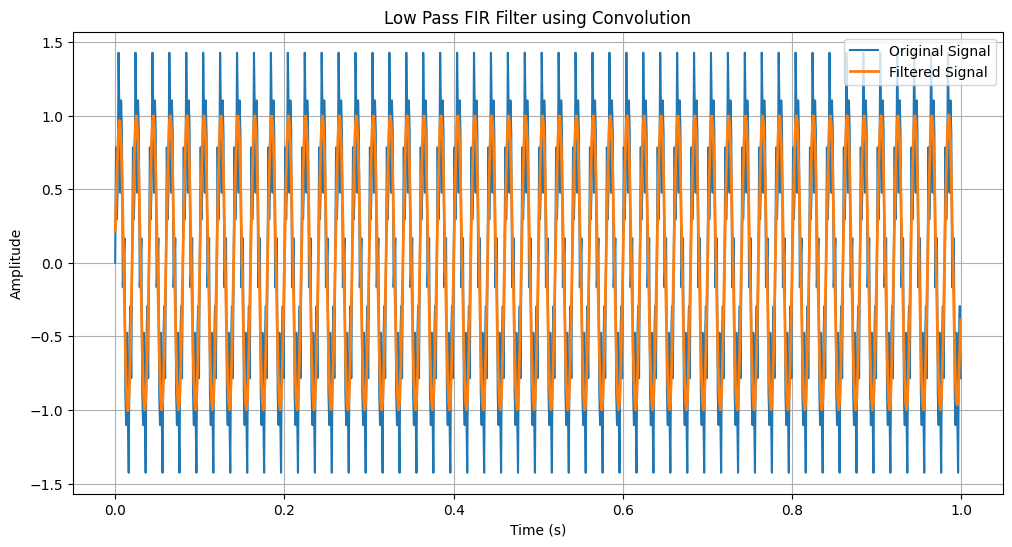

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

# Step 1: Filter Specs
fs = 1000         # Sampling frequency (Hz)
fc = 100          # Cutoff frequency (Hz)
N = 51            # Filter length (odd)

# Step 2: Time vector
n = np.arange(N)
center = (N - 1) / 2

# Ideal sinc filter
h = 2 * fc / fs * np.sinc(2 * fc * (n - center) / fs)

# Step 3: Apply window (Hamming)
hamming = np.hamming(N)
h = h * hamming

# Normalize the filter
h = h / np.sum(h)

# Step 4: Sample signal (e.g., 50Hz + 300Hz)
t = np.arange(0, 1.0, 1.0/fs)
x = np.sin(2*np.pi*50*t) + 0.5*np.sin(2*np.pi*300*t)

# Apply FIR filter using convolution
y = convolve(x, h, mode='same')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(t, x, label='Original Signal')
plt.plot(t, y, label='Filtered Signal', linewidth=2)
plt.legend()
plt.title('Low Pass FIR Filter using Convolution')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
